In [ ]:
import pandas as pd

#path to CSV file
df = pd.read_csv('437_proj.csv')

# Delete rows where the first column contains "Less than 1 hour"
df = df[df.iloc[:, 0] != "Less than 1 hour"]

#print(df)
df.style

,How many hours do you spend daily on social media platforms?,Do you frequently compare your life to others based on what you see on social media?,Do you feel stressed or anxious when you cannot access social media?,Have you ever experienced fear or anxiety from receiving negative comments or interactions on social media?,Do you feel overwhelmed by the volume of information or interactions on social media?,Do you find it harder to interact with people face-to-face compared to online?,Does the thought of attending social events or gatherings make you feel anxious because of how you perceive yourself on social media?,Do you often avoid social situations in real life due to fears related to your social media presence?,Do you believe your social media usage has impacted your mental health negatively?,Have you ever felt that social media negatively impacts your self-esteem or self-worth?,Would you consider reducing your social media usage to improve your mental well-being?
1,1–3 hours,Never,Often,Rarely,Never,Agree,Strongly Disagree,Never,Agree,Neutral,Definitely
2,4–6 hours,Rarely,Sometimes,Often,Often,Neutral,Neutral,Rarely,Strongly Agree,Agree,Definitely
3,4–6 hours,Sometimes,Sometimes,Sometimes,Sometimes,Agree,Disagree,Rarely,Strongly Agree,Agree,Definitely
4,4–6 hours,Rarely,Rarely,Sometimes,Sometimes,Disagree,Disagree,Sometimes,Agree,Neutral,Definitely
5,4–6 hours,Sometimes,Sometimes,Sometimes,Sometimes,Agree,Neutral,Rarely,Strongly Agree,Agree,Definitely
6,More than 6 hours,Never,Sometimes,Often,Never,Neutral,Disagree,Rarely,Disagree,Agree,Probably
7,1–3 hours,Rarely,Sometimes,Rarely,Never,Neutral,Strongly Disagree,Never,Agree,Neutral,Probably
8,4–6 hours,Sometimes,Rarely,Never,Never,Disagree,Strongly Disagree,Never,Strongly Disagree,Strongly Disagree,Neutral
9,4–6 hours,Sometimes,Sometimes,Sometimes,Sometimes,Agree,Agree,Always,Agree,Agree,Probably
10,1–3 hours,Often,Sometimes,Often,Sometimes,Agree,Agree,Often,Agree,Agree,Definitely


In [ ]:
frequencies = df.iloc[:, 0].value_counts()

# Extract frequencies for desired groups
group_frequencies = {
    "1–3 hours": frequencies.get("1–3 hours", 0),
    "4–6 hours": frequencies.get("4–6 hours", 0),
    "More than 6 hours": frequencies.get("More than 6 hours", 0)
}

# Print the group frequencies
print(group_frequencies)

{'1–3 hours': 32, '4–6 hours': 31, 'More than 6 hours': 16}


In [ ]:
total_rows = len(df.index)
print(f"Total rows: {total_rows}")
total_columns = len(df.columns)
print(f"Total columns: {total_columns}")

Total rows: 79
Total columns: 11


In [ ]:
print(df.columns)

Index(['How many hours do you spend daily on social media platforms? ',
       'Do you frequently compare your life to others based on what you see on social media? ',
       'Do you feel stressed or anxious when you cannot access social media? ',
       'Have you ever experienced fear or anxiety from receiving negative comments or interactions on social media? ',
       'Do you feel overwhelmed by the volume of information or interactions on social media?  ',
       'Do you find it harder to interact with people face-to-face compared to online?  ',
       'Does the thought of attending social events or gatherings make you feel anxious because of how you perceive yourself on social media? ',
       'Do you often avoid social situations in real life due to fears related to your social media presence?  ',
       'Do you believe your social media usage has impacted your mental health negatively? ',
       'Have you ever felt that social media negatively impacts your self-esteem or self-wo

In [ ]:
# Rename the first column to 'hours'
df = df.rename(columns={df.columns[0]: 'hours'})

# Rename the rest of the columns to Q1, Q2, Q3, ...
df.columns = ['hours'] + [f'Q{i}' for i in range(1, len(df.columns))]


In [ ]:
print(df.columns)

Index(['hours', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], dtype='object')


In [ ]:
mapping_Q1 = {
    "Always": 5,
    "Often": 4,
    "Sometimes": 3,
    "Rarely": 2,
    "Never": 1
}

mapping_Q2 = {
    "Strongly Agree": 5,
    "Agree": 4,
    "Neutral": 3,
    "Disagree": 2,
    "Strongly Disagree": 1
}

mapping_Q3 = {
    "Definitely": 5,
    "Probably": 4,
    "Neutral": 3,
    "Probably Not": 2,
    "Definitely Not": 1
}


# Anxiety-related columns and their corresponding mappings
anxiety_columns_mappings = {
    "Q1": mapping_Q1,
    "Q2": mapping_Q1,
    "Q3": mapping_Q1,
    "Q4": mapping_Q1,
    "Q5": mapping_Q2,
    "Q6": mapping_Q2,
    "Q7": mapping_Q1,
    "Q8": mapping_Q2,
    "Q9": mapping_Q2,
    "Q10": mapping_Q3,
}

# Apply mappings to respective columns
for col, mapping in anxiety_columns_mappings.items():
    df[col] = df[col].map(mapping)

# Calculate the anxiety score (sum)
df["AnxietyScore"] = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].sum(axis=1)

In [ ]:
df.style

,hours,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,AnxietyScore
1,1–3 hours,1,4,2,1,4,1,1,4,3,5,26
2,4–6 hours,2,3,4,4,3,3,2,5,4,5,35
3,4–6 hours,3,3,3,3,4,2,2,5,4,5,34
4,4–6 hours,2,2,3,3,2,2,3,4,3,5,29
5,4–6 hours,3,3,3,3,4,3,2,5,4,5,35
6,More than 6 hours,1,3,4,1,3,2,2,2,4,4,26
7,1–3 hours,2,3,2,1,3,1,1,4,3,4,24
8,4–6 hours,3,2,1,1,2,1,1,1,1,3,16
9,4–6 hours,3,3,3,3,4,4,5,4,4,4,37
10,1–3 hours,4,3,4,3,4,4,4,4,4,5,39


In [ ]:
import pandas as pd

range = {
    '0-18':'Not Anxious',
    '19-24': 'Slightly Anxious',
    '25-30':'Anxious',
    '31-40':'Moderately Anxious',
    '41-50':'Very Anxious',
}

def categorize_anxiety(score):
    for key, value in range.items():
        lower, upper = map(int, key.split('-'))
        if lower <= score <= upper:
            return value
    return "Unknown"  # Handle cases outside the defined ranges

df['AnxietyCategory'] = df['AnxietyScore'].apply(categorize_anxiety)
df.style

,hours,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,AnxietyScore,AnxietyCategory
1,1–3 hours,1,4,2,1,4,1,1,4,3,5,26,Anxious
2,4–6 hours,2,3,4,4,3,3,2,5,4,5,35,Moderately Anxious
3,4–6 hours,3,3,3,3,4,2,2,5,4,5,34,Moderately Anxious
4,4–6 hours,2,2,3,3,2,2,3,4,3,5,29,Anxious
5,4–6 hours,3,3,3,3,4,3,2,5,4,5,35,Moderately Anxious
6,More than 6 hours,1,3,4,1,3,2,2,2,4,4,26,Anxious
7,1–3 hours,2,3,2,1,3,1,1,4,3,4,24,Slightly Anxious
8,4–6 hours,3,2,1,1,2,1,1,1,1,3,16,Not Anxious
9,4–6 hours,3,3,3,3,4,4,5,4,4,4,37,Moderately Anxious
10,1–3 hours,4,3,4,3,4,4,4,4,4,5,39,Moderately Anxious


<ipython-input-16-1f6f0c773ef6>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AnxietyCategory', y='AnxietyScore', data=df, ci=None, palette='viridis')
<ipython-input-16-1f6f0c773ef6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AnxietyCategory', y='AnxietyScore', data=df, ci=None, palette='viridis')


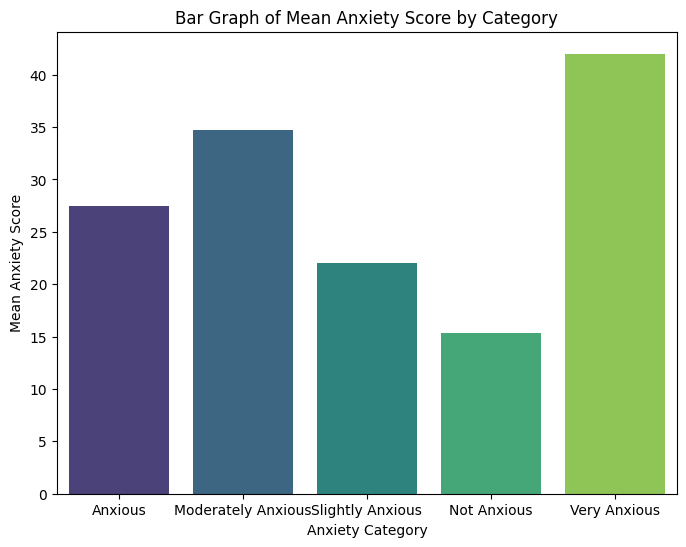

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='AnxietyCategory', y='AnxietyScore', data=df, ci=None, palette='viridis')

plt.title('Bar Graph of Mean Anxiety Score by Category')
plt.xlabel('Anxiety Category')
plt.ylabel('Mean Anxiety Score')


plt.show()




In [ ]:
anxiety_by_hours = pd.crosstab(df['AnxietyCategory'], df['hours'])

# Display the new DataFrame
anxiety_by_hours

hours,1–3 hours,4–6 hours,More than 6 hours
AnxietyCategory,,,
Anxious,12,14,5
Moderately Anxious,6,11,9
Not Anxious,4,2,0
Slightly Anxious,9,2,1
Very Anxious,1,2,1


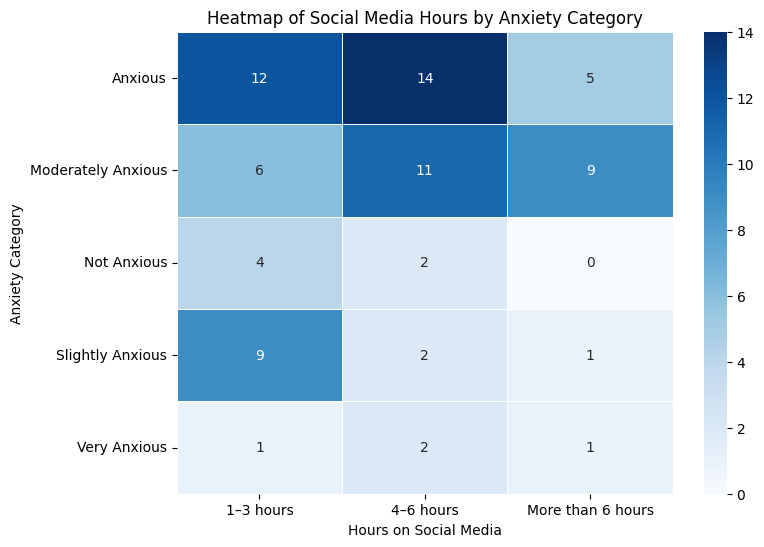

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(anxiety_by_hours, annot=True, cmap="Blues", linewidths=0.5)

plt.title("Heatmap of Social Media Hours by Anxiety Category")
plt.xlabel("Hours on Social Media")
plt.ylabel("Anxiety Category")


plt.show()



In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

anxiety_by_hours = pd.crosstab(df['AnxietyCategory'], df['hours'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(anxiety_by_hours)

print("Expected frequencies:")
expected

Expected frequencies:


array([[12.55696203, 12.16455696,  6.27848101],
       [10.53164557, 10.20253165,  5.26582278],
       [ 2.43037975,  2.35443038,  1.21518987],
       [ 4.86075949,  4.70886076,  2.43037975],
       [ 1.62025316,  1.56962025,  0.81012658]])

In [ ]:
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")


Chi-Square statistic: 13.829452826916407
P-value: 0.08632040462152735
Degrees of freedom: 8
